# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

## Importing the dataset

In [2]:
dataset = pd.read_csv('Dataset-Mental-Disorders.csv')

In [3]:
X = dataset.iloc[:, 1:-1].values  
y = dataset.iloc[:, -1].values    

In [4]:
print(dataset.head())

  Patient Number    Sadness    Euphoric  Exhausted Sleep dissorder Mood Swing  \
0     Patiant-01    Usually      Seldom  Sometimes       Sometimes        YES   
1     Patiant-02    Usually      Seldom    Usually       Sometimes         NO   
2     Patiant-03  Sometimes  Most-Often  Sometimes       Sometimes        YES   
3     Patiant-04    Usually      Seldom    Usually      Most-Often        YES   
4     Patiant-05    Usually     Usually  Sometimes       Sometimes         NO   

  Suicidal thoughts Anorxia Authority Respect Try-Explanation  \
0              YES       NO                NO             YES   
1               YES      NO                NO              NO   
2                NO      NO                NO             YES   
3               YES     YES                NO             YES   
4                NO      NO                NO              NO   

  Aggressive Response Ignore & Move-On Nervous Break-down Admit Mistakes  \
0                  NO               NO        

In [5]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual Activity      120 non-null    object
 16  Concentr

In [6]:
# periksa nilai yang hilang di setiap kolom
print(dataset.isnull().sum())

Patient Number         0
Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      0
Anorxia                0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimisim              0
Expert Diagnose        0
dtype: int64


## Encoding data kategori 

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False), list(range(0, 17)))], remainder='passthrough')

X = np.array(ct.fit_transform(X))

In [8]:
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 1. 0.]]


## Encoding data kategori (Label)

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [10]:
print(y)

[1 2 0 1 3 2 0 3 1 2 3 0 1 3 2 0 3 0 2 3 1 0 3 2 1 3 3 2 1 3 0 2 1 0 3 2 0
 1 3 1 2 1 3 0 2 1 3 1 0 2 3 1 2 0 1 3 0 0 2 3 1 2 0 1 3 2 3 0 1 0 2 1 0 3
 1 2 2 1 3 2 0 1 2 3 0 1 2 0 0 3 2 1 3 0 2 1 0 3 2 1 0 2 0 3 1 2 3 2 1 2 3
 1 0 1 3 2 0 1 2 3]


In [11]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual Activity      120 non-null    object
 16  Concentr

## Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the K-NN model on the Training set

**Finding the best value for k**

In [14]:
from sklearn.metrics import accuracy_score
k_range = range(1,26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

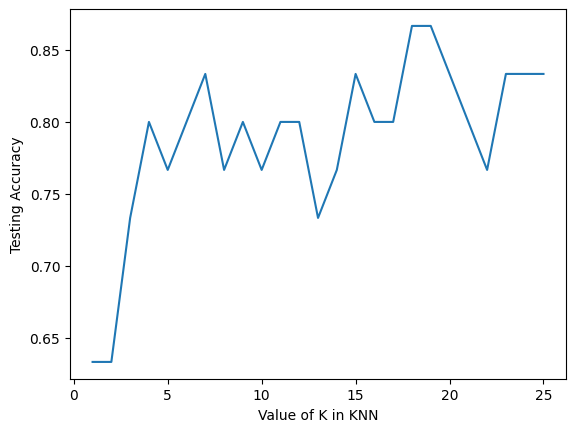

In [15]:
plt.xlabel("Value of K in KNN")
plt.ylabel("Testing Accuracy")
plt.plot(k_range,scores)

In [16]:
optimal_k = k_range[np.argmax(scores)]
print(f"Optimal K: {optimal_k}")

Optimal K: 18


In [17]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 18, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

## Predicting the Test set results

In [18]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8667


## Making the Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4 1 0 0]
 [0 6 0 0]
 [1 0 8 0]
 [0 0 2 8]]


## Visualising the Training set results

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.transform(X_test)

In [21]:
# Menampilkan koefisien komponen utama
print("Koefisien Komponen PCA (Loading Scores):")
for i, component in enumerate(pca.components_):
    print(f"Komponen {i+1}:")
    for feature, score in zip(dataset.columns[:-1], component):  
        print(f"{feature}: {score}")
    print("\n")

Koefisien Komponen PCA (Loading Scores):
Komponen 1:
Patient Number: 0.18415417004278167
Sadness: -0.017211476463178
Euphoric: -0.2275875215345482
Exhausted: 0.1028023985461623
Sleep dissorder: -0.07591160604033725
Mood Swing: 0.16330366886063205
Suicidal thoughts: -0.029348989250816186
Anorxia: -0.11710204252925244
Authority Respect: 0.13660773368796858
Try-Explanation: 0.014020959692604152
Aggressive Response: -0.1649210114614847
Ignore & Move-On: 0.026114598019046413
Nervous Break-down: 0.11220478374701755
Admit Mistakes: -0.19292510197697718
Overthinking: 0.024289836799873267
Sexual Activity: 0.034359959026438715
Concentration: -0.23207775521715
Optimisim: 0.23207775521714996


Komponen 2:
Patient Number: -0.18668725802512162
Sadness: 0.16170948700067367
Euphoric: 0.03852653641618366
Exhausted: -0.01192294891876422
Sleep dissorder: 0.09847085843519277
Mood Swing: -0.17313613331543823
Suicidal thoughts: -0.011790288310878722
Anorxia: 0.1635183618273523
Authority Respect: -0.07470997

C:\Users\RESTU\AppData\Local\Temp\ipykernel_27892\1872238019.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


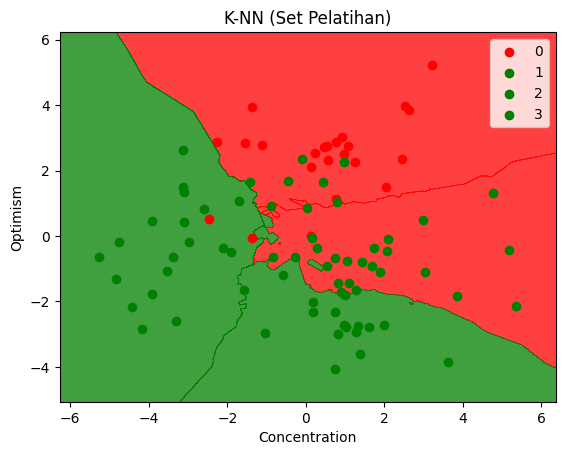

In [22]:
# Latih model KNN menggunakan data yang telah direduksi menjadi 2D
classifier.fit(X_train_2D, y_train)

# Visualisasi hasil set pelatihan
X_set, y_set = X_train_2D, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Set Pelatihan)')
# Visualisasi hasil set pelatihan
plt.xlabel('Concentration')  # Fitur utama dari komponen 1
plt.ylabel('Optimism')  # Fitur utama dari komponen 2
plt.legend()
plt.show()


## Visualising the Test set results

C:\Users\RESTU\AppData\Local\Temp\ipykernel_27892\2527860669.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


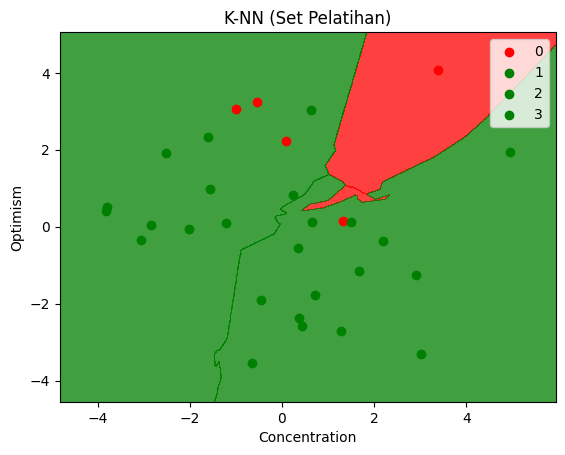

In [23]:
# Latih model KNN menggunakan data yang telah direduksi menjadi 2D
classifier.fit(X_test_2D, y_test)

# Visualisasi hasil set test
X_set, y_set = X_test_2D, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Set Pelatihan)')
# Visualisasi hasil set test
plt.xlabel('Concentration')  # Fitur utama dari komponen 1
plt.ylabel('Optimism')  # Fitur utama dari komponen 2
plt.legend()
plt.show()